In [1]:
import pandas as pd 
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from data_fetcher import DataFetcher
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pickle
from transformers import ColumnRenamerAndResetIndex



In [2]:
#sample data
fetcher=DataFetcher('AAPL', '2024-01-01', '2025-01-01')
data=fetcher.getStockData()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Price-Ticker', ylabel='Price-Ticker'>

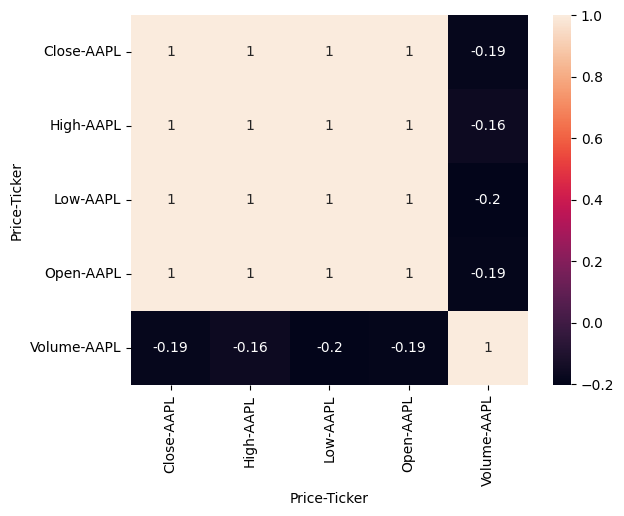

In [3]:
corr=data.corr()
sns.heatmap(corr, annot=True)

In [4]:
pipeline= Pipeline(steps=[
    ('column_renamer', ColumnRenamerAndResetIndex()),
    ('preprocessor', Pipeline(steps=[
                ('Imputer', SimpleImputer(strategy='mean')),
                ('scaler', StandardScaler())
                ])),
    ('model', LinearRegression())
])

X=data.drop('Close', axis=1)
y=data['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model=pipeline.fit(X_train,y_train)
y_pred=model.predict(X_test)


In [ ]:
with open('model_pipeline.pkl', 'wb') as pipeline_file:
    pickle.dump(pipeline, pipeline_file)